#### kNR_boston

In [1]:
# bostonデータをロード
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# データフレーム形式に変換
# カラム名を説明変数に設定
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [4]:
# 目的変数を確認
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
# 説明を表示
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
# 目的変数部分だけをデータフレーム形式に変換
boston_target_data = pd.DataFrame(boston.target, columns=['MEDV'])

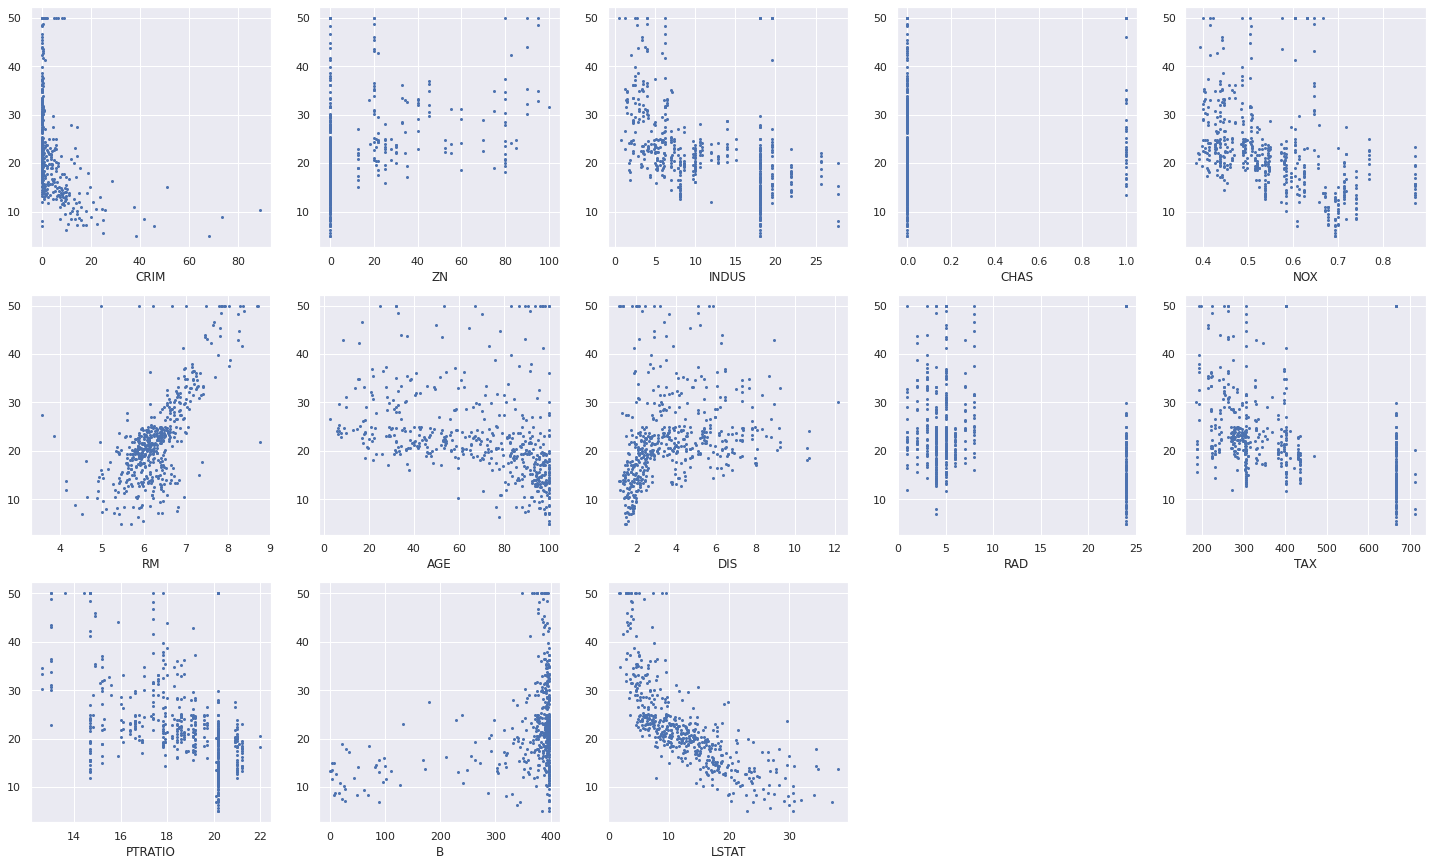

In [16]:
# 説明変数 vs 目的変数 の散布図を表示
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set()
plt.rcParams['lines.markersize'] = 2

i = 1
for columns in boston.feature_names:
  plt.subplot(3,5,i)
  plt.scatter(boston_df[columns], boston_target_data)
  plt.xlabel("{}".format(columns))
  i += 1

plt.show()

In [ ]:
## 前処理、交差検証はtaskにする
# コードの使い方を見せるためにこのままkNNR

In [17]:
## ホールドアウト
# 交差検証はtaskにする
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston_df, boston.target)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# デフォルト値（k=5）で回帰するインスタンス生成
knr = KNeighborsRegressor()

In [19]:
# 学習用データを渡す
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [20]:
# テスト用データによる予測結果を取得
Y_pred = knr.predict(X_test)

In [26]:
## 予測結果と正解（テスト用データの目的変数）との誤差を計算
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print('平均二乗誤差\t: ', mse)
print('その平方根\t: ', mse**(1/2))

平均二乗誤差	:  35.21048188976379
その平方根	:  5.93384208500393


In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

print('平均絶対誤差\t: ', mae)

平均絶対誤差	:  4.246929133858269


In [35]:
## kの値による誤差の変化を調べる

# 平均絶対誤差を保持する入れ物
mae_list = []
# 平均二乗誤差を保持する入れ物
mse_list = []

# k=1〜100 でk近傍法を行いそれぞれ誤差２種を取得
k_range = range(1, 101)
for k in k_range:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_test)
  mae_list.append(mean_absolute_error(Y_test, Y_pred))
  mse_list.append(mean_squared_error(Y_test, Y_pred))

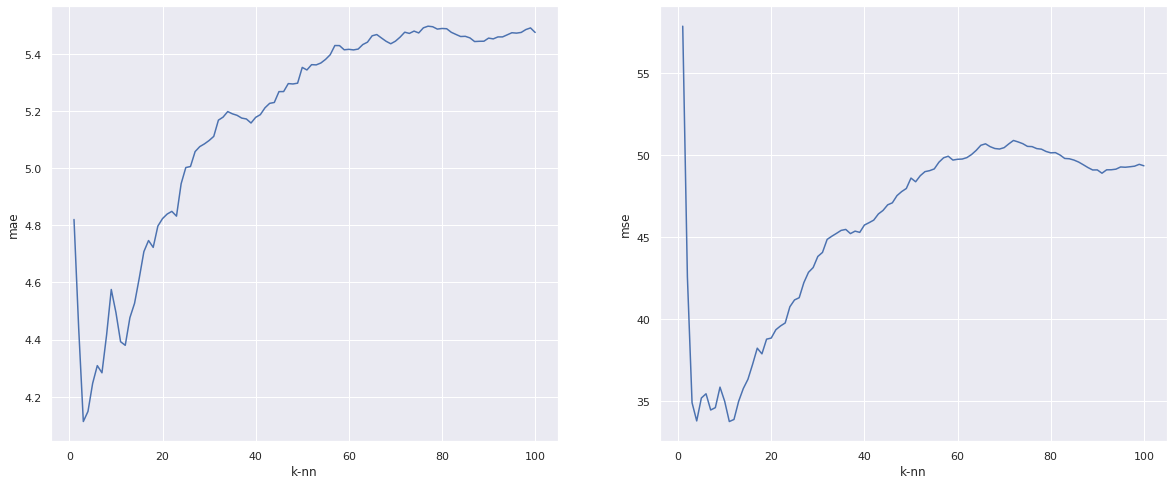

In [34]:
# 図示
plt.figure(figsize=(20, 8))
sns.set()

# 左側に平均絶対誤差:mae
plt.subplot(1,2,1)
plt.plot(k_range, mae_list)
plt.xlabel('k-nn')
plt.ylabel("mae")

# 右側に平均二乗誤差:mse
plt.subplot(1,2,2)
plt.plot(k_range, mse_list)
plt.xlabel('k-nn')
plt.ylabel("mse")

plt.show()

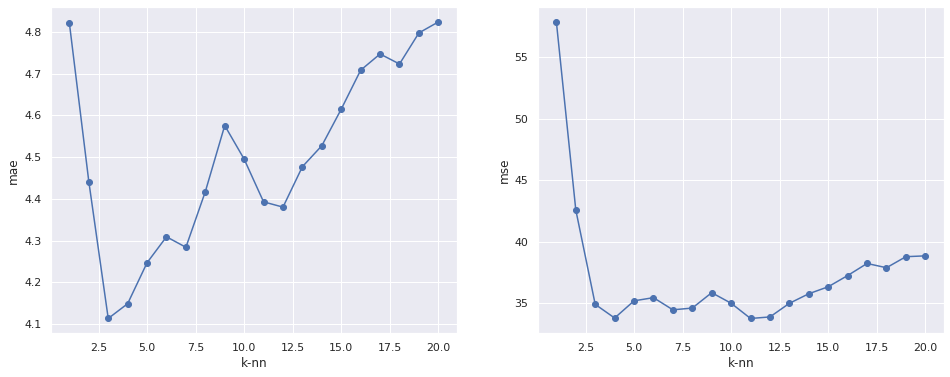

In [39]:
# k=1〜20 を拡大表示（抽出）

# 図示
plt.figure(figsize=(16, 6))
sns.set()

# 左側に平均絶対誤差:mae
plt.subplot(1,2,1)
plt.plot(k_range[0:20], mae_list[0:20], "bo-")
plt.xlabel('k-nn')
plt.ylabel("mae")

# 右側に平均二乗誤差:mse
plt.subplot(1,2,2)
plt.plot(k_range[0:20], mse_list[0:20], "bo-")
plt.xlabel('k-nn')
plt.ylabel("mse")

plt.show()